In [3]:
from com.javahabit.utils.courseUtils import courseUtils

TRAIN_FILE_URL="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip"
TEST_FILE_URL="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip"

BASE_FILE_DIR='C:/Dinesh/github-proj/tensorflow-cert/data/rock-paper-sci/'




In [2]:
#Download the train zip file
c = courseUtils();
c.download(fileUrlPath=TRAIN_FILE_URL,
                     downloadFolder= BASE_FILE_DIR + 'train/rps.zip')

c.download(fileUrlPath=TEST_FILE_URL, downloadFolder= BASE_FILE_DIR + 'test/rps-test-set.zip')


In [3]:
#Unzip the train and test zip file. Delete the zip file after unzip
c.unzipAndDelete(sourcePath= BASE_FILE_DIR + 'train/rps.zip', destFolder=BASE_FILE_DIR + 'train' )
c.unzipAndDelete(sourcePath= BASE_FILE_DIR + 'test/rps-test-set.zip', destFolder=BASE_FILE_DIR + 'test' )




In [4]:
#Define the model
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as model
import os
#Check the number of Train images
TRAIN_ROCK_DIR = BASE_FILE_DIR + 'train/rps/rock/'
TRAIN_PAPER_DIR = BASE_FILE_DIR + 'train/rps/paper/'
TRAIN_SCI_DIR = BASE_FILE_DIR + 'train/rps/scissors/'

print('# Rock Images: ' ,  len(os.listdir(TRAIN_ROCK_DIR)))
print('# Paper Images: ' , len(os.listdir(TRAIN_PAPER_DIR)))
print('# Scissor Images: ' ,  len(os.listdir(TRAIN_SCI_DIR)))


# Rock Images:  840
# Paper Images:  840
# Scissor Images:  840


In [5]:
from matplotlib import pyplot as plt

# Show the top images
#plt.gcf
counter=4
width=10
height=10
fig=plt.gcf()
fig.set_size_inches(4*4, 4*4)


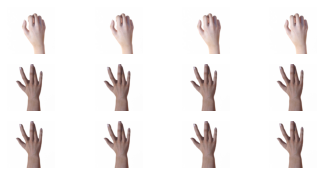

In [6]:
#Create the list of first 4 files of each type
next_rock_imgList = [os.path.join(TRAIN_ROCK_DIR, fname)
                     for fname in os.listdir(TRAIN_ROCK_DIR)[counter-4:counter]]
next_paper_imgList = [os.path.join(TRAIN_PAPER_DIR, fname)
                     for fname in os.listdir(TRAIN_PAPER_DIR)[counter-4:counter]]
next_sci_imgList = [os.path.join(TRAIN_PAPER_DIR, fname)
                     for fname in os.listdir(TRAIN_PAPER_DIR)[counter-4:counter]]

#In python Enumerate takes a list makes list Map as ['1': 'c:/image.png'] and for loop gives key value pair
for key, value in enumerate(next_rock_imgList + next_paper_imgList + next_sci_imgList):
    figure = plt.subplot(4,4,key+1)
    figure.axis('off')
    imgplot = plt.imread(value)
    plt.imshow(imgplot)
plt.show()
counter = counter + 4


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale= 1/255.,
                                     featurewise_center=True,
                                     rotation_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     fill_mode='nearest')

test_generator = ImageDataGenerator(rescale=1/255.)
train_gen = train_generator.flow_from_directory(directory= BASE_FILE_DIR + 'train/rps/',
                                                target_size=(150,150),
                                                class_mode='categorical',
                                                batch_size=126)

test_gen = test_generator.flow_from_directory(directory= BASE_FILE_DIR + 'test/rps-test-set/',
                                              target_size=(150,150),
                                              class_mode='categorical',
                                              batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
# Define the model
trainModel = model.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    layers.Conv2D(16,(3,3), input_shape=(150,150,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # This is the second convolution
    layers.Conv2D(32,(3,3),  activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    # This is the third convolution
    layers.Conv2D(32,(3,3),  activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #Add dense layers
    layers.Flatten(),
    layers.Dropout(0.2),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')

])
#Compile the model
trainModel.compile(optimizer='rmsprop',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

trainModel.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

In [9]:
#run the model evaluation
history = trainModel.fit(train_gen,
                                   steps_per_epoch=20,
                                   epochs=15,
                                   verbose=2,
                                   validation_data=test_gen,
                                   validation_steps=10)

c:\users\dines\anaconda3\envs\tensorflow-cert\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
20/20 - 117s - loss: 1.3703 - accuracy: 0.5325 - val_loss: 1.1337 - val_accuracy: 0.3978
Epoch 2/15
20/20 - 140s - loss: 0.3986 - accuracy: 0.8512 - val_loss: 1.1838 - val_accuracy: 0.5296
Epoch 3/15
20/20 - 115s - loss: 0.1576 - accuracy: 0.9488 - val_loss: 0.4374 - val_accuracy: 0.8441
Epoch 4/15
20/20 - 113s - loss: 0.0817 - accuracy: 0.9754 - val_loss: 0.6264 - val_accuracy: 0.8065
Epoch 5/15
20/20 - 110s - loss: 0.1886 - accuracy: 0.9563 - val_loss: 0.5524 - val_accuracy: 0.7742
Epoch 6/15
20/20 - 113s - loss: 0.0359 - accuracy: 0.9956 - val_loss: 0.7155 - val_accuracy: 0.7984
Epoch 7/15
20/20 - 121s - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.8754 - val_accuracy: 0.7796
Epoch 8/15
20/20 - 111s - loss: 0.2227 - accuracy: 0.9429 - val_loss: 0.8905 - val_accuracy: 0.7903
Epoch 9/15
20/20 - 106s - loss: 0.0053 - accuracy: 0.9988 - val_loss: 0.9904 - val_accuracy: 0.7796
Epoch 10/15
20/20 - 110s - loss: 0.0026 - accuracy: 0.9992 - val_loss: 1.2894 - val_accuracy: 0.7688

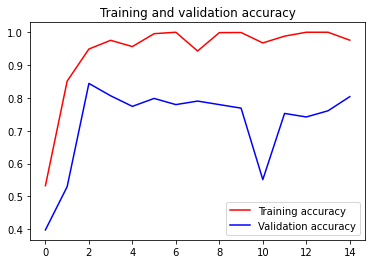

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

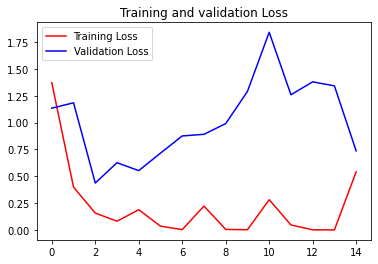

<Figure size 432x288 with 0 Axes>

In [11]:
#Create the plot
train_acc = history.history['accuracy']
train_loss = history.history['loss']

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

epochs = range(len(train_acc))

plt.plot(epochs, train_acc,'r', label='Training accuracy')
plt.plot(epochs, test_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

plt.plot(epochs, train_loss,'r', label='Training Loss')
plt.plot(epochs, test_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

In [44]:
import numpy as np
a= np.zeros([3,2])
np.append(a,[1,1], axis=0)
np.append(a,[2,2], axis=0)
np.append(a,[3,3], axis=0)
np.append(a,[4,4], axis=0)
x= np.array_split(np.array(a),2)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [45]:
print(a)
print(x)


[[0. 0.]
 [0. 0.]
 [0. 0.]]
[array([[0., 0.]]), array([[0., 0.]]), array([[0., 0.]])]
